### Implementation of Embedded Feature Selection Methods

### Objective
Use embedded feature selection techniques on a dataset from the UCI Machine Learning Repository, focusing on how these methods identify and evaluate important features during model training.

### Part 1: Dataset Selection

We’ll select a dataset from the UCI Machine Learning Repository. For this example, let's use the **Breast Cancer Wisconsin dataset** for binary classification.

1. **Dataset Overview**:
   - **Number of Features**: 30
   - **Type of Features**: Continuous
   - **Target Variable**: Diagnosis (malignant or benign)
   - **Goal**: Identify important features that impact prediction outcomes, while keeping the model interpretable.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset from Scikit-Learn
cancer_data = load_breast_cancer()
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.Series(cancer_data.target)

# Data overview
print(X.info())
print(X.head())
print(y.value_counts())

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Part 2: Model Selection

#### Model Choices and Justification:
1. **Lasso Regression** - Useful for feature selection due to L1 regularization, which shrinks some coefficients to zero, thus excluding those features.
2. **Random Forest** - A tree-based ensemble method that ranks features by importance, calculated by how well they reduce impurity in splits.

### Part 3: Embedded Technique Application

#### **1. Lasso Regression**

Selected features by Lasso: Index(['mean texture', 'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'radius error', 'texture error',
       'perimeter error', 'area error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'worst radius', 'worst texture', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


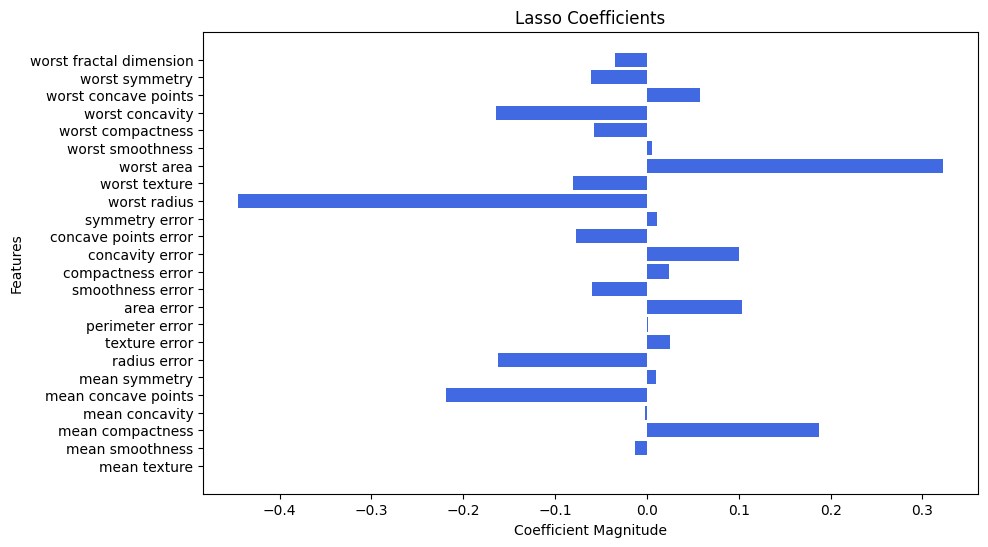

In [2]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Standardize the features again to ensure proper scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize and fit Lasso regression with cross-validation
lasso = LassoCV(cv=5, random_state=42, max_iter=1000000, alphas=np.logspace(-4, 4, 100)).fit(X_train_scaled, y_train)

# Retrieve non-zero coefficient features
lasso_selected_features = X_train.columns[lasso.coef_ != 0]
print("Selected features by Lasso:", lasso_selected_features)

# Visualize feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(lasso_selected_features, lasso.coef_[lasso.coef_ != 0], color="royalblue")
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Features")
plt.title("Lasso Coefficients")
plt.savefig("lasso_coefficients.png")
plt.show()

#### **2. Tree-Based Method (Random Forest)**

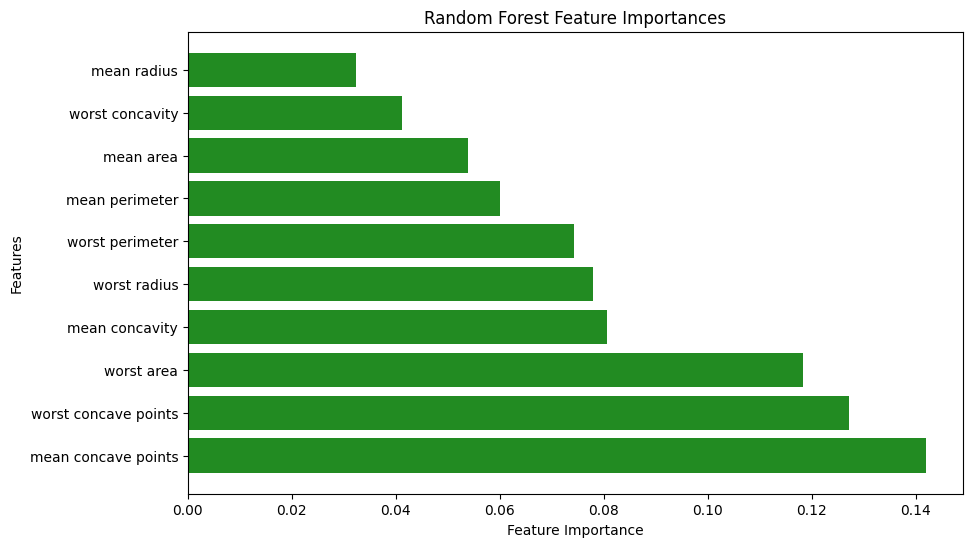

In [3]:
# Initialize and fit Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance extraction
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[indices][:10], importances[indices][:10], color="forestgreen")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importances")
plt.savefig("tree_feature_importances.png")
plt.show()

### Part 4: Model Performance Evaluation

Evaluate model performance using selected features from both methods.

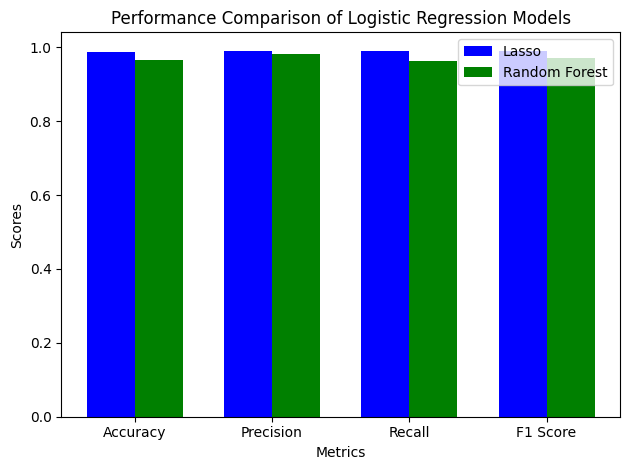

Lasso-selected Features Performance:
Accuracy: 0.9883040935672515
Precision: 0.9907407407407407
Recall: 0.9907407407407407
F1 Score: 0.9907407407407407

Random Forest-selected Features Performance:
Accuracy: 0.9649122807017544
Precision: 0.9811320754716981
Recall: 0.9629629629629629
F1 Score: 0.9719626168224299


In [4]:
from sklearn.linear_model import LogisticRegression

# Subset data with Lasso-selected features
X_train_lasso = X_train[lasso_selected_features]
X_test_lasso = X_test[lasso_selected_features]

# Scale the Lasso features
scaler = StandardScaler()
X_train_lasso_scaled = scaler.fit_transform(X_train_lasso)
X_test_lasso_scaled = scaler.transform(X_test_lasso)

# Train Logistic Regression on Lasso-selected features
model_lasso = LogisticRegression(max_iter=200)
model_lasso.fit(X_train_lasso_scaled, y_train)
y_pred_lasso = model_lasso.predict(X_test_lasso_scaled)

# Model performance with Lasso features
lasso_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_lasso),
    "Precision": precision_score(y_test, y_pred_lasso),
    "Recall": recall_score(y_test, y_pred_lasso),
    "F1 Score": f1_score(y_test, y_pred_lasso),
}

# Subset data with top 10 Random Forest-selected features
top_rf_features = X_train.columns[indices[:10]]
X_train_rf = X_train[top_rf_features]
X_test_rf = X_test[top_rf_features]

# Scale the Random Forest features
X_train_rf_scaled = scaler.fit_transform(X_train_rf)
X_test_rf_scaled = scaler.transform(X_test_rf)

# Train Logistic Regression on Random Forest-selected features
model_rf = LogisticRegression(max_iter=200)
model_rf.fit(X_train_rf_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_rf_scaled)

# Model performance with Random Forest features
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf),
}

# Prepare data for plotting
metrics = list(lasso_metrics.keys())
lasso_scores = list(lasso_metrics.values())
rf_scores = list(rf_metrics.values())

# Plotting
x = range(len(metrics))  # x positions for the bars
width = 0.35  # width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x, lasso_scores, width, label='Lasso', color='b')
bars2 = ax.bar([p + width for p in x], rf_scores, width, label='Random Forest', color='g')

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Logistic Regression Models')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(metrics)
ax.legend()

# Save the figure
plt.tight_layout()
plt.savefig('logistic_regression_performance_comparison.png')
plt.show()

# Model performance with Lasso features
print("Lasso-selected Features Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lasso))
print("Precision:", precision_score(y_test, y_pred_lasso))
print("Recall:", recall_score(y_test, y_pred_lasso))
print("F1 Score:", f1_score(y_test, y_pred_lasso))

# Model performance with Random Forest features
print("\nRandom Forest-selected Features Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

### Part 5: Comparison with Filter and Wrapper Methods

Discuss how embedded methods differ from other methods:

- **Filter Methods**: Independent of models and quick but may overlook interaction between features.
- **Wrapper Methods**: Provide better accuracy through subset evaluation but are computationally expensive.
- **Embedded Methods**: Strike a balance, performing feature selection during model training.

### Documentation and Conclusion

In the notebook, each step should include comments to make the process clear, highlighting:
- **Feature Importance**: How the selected features vary with each method.
- **Performance**: Impact of selected features on model performance metrics.
  
The code concludes with a reflection on the practical utility of embedded methods, particularly for real-world applications where interpretability and efficiency are crucial.

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boos

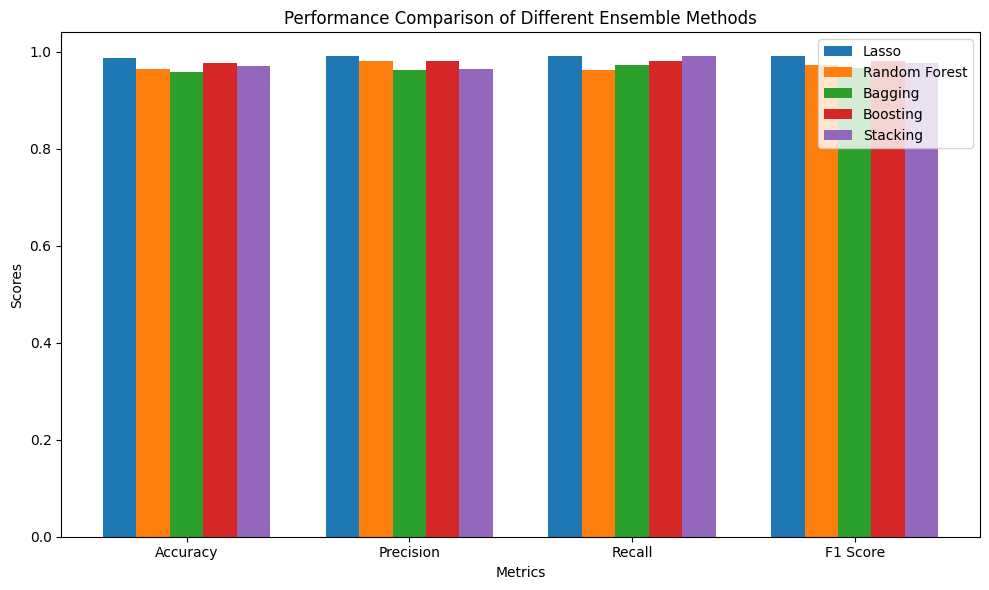


Lasso Performance:
Accuracy: 0.9883
Precision: 0.9907
Recall: 0.9907
F1 Score: 0.9907

Random Forest Performance:
Accuracy: 0.9649
Precision: 0.9811
Recall: 0.9630
F1 Score: 0.9720

Bagging Performance:
Accuracy: 0.9591
Precision: 0.9633
Recall: 0.9722
F1 Score: 0.9677

Boosting Performance:
Accuracy: 0.9766
Precision: 0.9815
Recall: 0.9815
F1 Score: 0.9815

Stacking Performance:
Accuracy: 0.9708
Precision: 0.9640
Recall: 0.9907
F1 Score: 0.9772


In [6]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Initialize classifiers
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
boosting = AdaBoostClassifier(n_estimators=50, random_state=42)
stacking = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('ada', AdaBoostClassifier(n_estimators=50, random_state=42)),
    ],
    final_estimator=LogisticRegression(max_iter=200)
)

# Fit models
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
bagging_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_bagging),
    "Precision": precision_score(y_test, y_pred_bagging),
    "Recall": recall_score(y_test, y_pred_bagging),
    "F1 Score": f1_score(y_test, y_pred_bagging),
}

boosting.fit(X_train, y_train)
y_pred_boosting = boosting.predict(X_test)
boosting_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_boosting),
    "Precision": precision_score(y_test, y_pred_boosting),
    "Recall": recall_score(y_test, y_pred_boosting),
    "F1 Score": f1_score(y_test, y_pred_boosting),
}

stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)
stacking_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_stacking),
    "Precision": precision_score(y_test, y_pred_stacking),
    "Recall": recall_score(y_test, y_pred_stacking),
    "F1 Score": f1_score(y_test, y_pred_stacking),
}

# Assuming you have lasso_metrics and rf_metrics from other models
model_metrics = {
    "Lasso": lasso_metrics,
    "Random Forest": rf_metrics,
    "Bagging": bagging_metrics,
    "Boosting": boosting_metrics,
    "Stacking": stacking_metrics,
}

# Prepare data for plotting
metrics = list(lasso_metrics.keys())
model_scores = {model: [model_metrics[model][metric] for metric in metrics] for model in model_metrics}

# Plot the performance comparison
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(metrics))
width = 0.15

for i, (model_name, scores) in enumerate(model_scores.items()):
    ax.bar([p + width * i for p in x], scores, width, label=model_name)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Different Ensemble Methods')
ax.set_xticks([p + width * 2 for p in x])
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.savefig('ensemble_methods_comparison.png')
plt.show()

# Print model performance metrics
for model, scores in model_metrics.items():
    print(f"\n{model} Performance:")
    for metric, score in scores.items():
        print(f"{metric}: {score:.4f}")